In [1]:
import os
import LMRt
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles
from tqdm import tqdm
import pickle
from matplotlib import gridspec

In [2]:
# SEA on GCM simulations

GCM_namelist = ['bcc', 'GISS', 'HadCM3', 'IPSL', 'MIROC', 'MPI-ESM-P', 'CSIRO', 'CCSM4', 'iCESM', 'CESM-LME']

events_G08 = [1600, 1641, 1673, 1693, 1815, 1835] 
sea_rmt_pages2k = {}
sea_rmt_ntrend = {}
for sim_name in GCM_namelist:
    with open(f'../data/gcm_sims/rmt_{sim_name}_pages2k.pkl', 'rb') as f:
        rmt, year = pickle.load(f)
    sea_rmt_pages2k[sim_name] = LMRt.utils.sea(rmt, events_G08, preyr=5, postyr=10, start_yr=year[0])
    
    with open(f'../data/gcm_sims/rmt_{sim_name}_ntrend.pkl', 'rb') as f:
        rmt, year = pickle.load(f)
    sea_rmt_ntrend[sim_name] = LMRt.utils.sea(rmt, events_G08, preyr=5, postyr=10, start_yr=year[0])
    
GCM_composites_pages2k = np.ndarray((len(GCM_namelist), np.size(sea_rmt_pages2k['iCESM']['composite_yr'])))
for i, GCM_tag in enumerate(GCM_namelist):
    GCM_composites_pages2k[i] = sea_rmt_pages2k[GCM_tag]['composite']
    
GCM_qs = mquantiles(GCM_composites_pages2k, [0.05, 0.5, 0.95], axis=0)
sea_GCMs_composite_pages2k = sea_rmt_pages2k['iCESM'].copy()
sea_GCMs_composite_pages2k['composite'] = GCM_qs[1]  # median
sea_GCMs_composite_pages2k['composite_qs'] = GCM_qs  # quantiles

GCM_composites_ntrend = np.ndarray((len(GCM_namelist), np.size(sea_rmt_ntrend['iCESM']['composite_yr'])))
for i, GCM_tag in enumerate(GCM_namelist):
    GCM_composites_ntrend[i] = sea_rmt_ntrend[GCM_tag]['composite']
    
GCM_qs = mquantiles(GCM_composites_ntrend, [0.05, 0.5, 0.95], axis=0)
sea_GCMs_composite_ntrend = sea_rmt_ntrend['iCESM'].copy()
sea_GCMs_composite_ntrend['composite'] = GCM_qs[1]  # median
sea_GCMs_composite_ntrend['composite_qs'] = GCM_qs  # quantiles

In [3]:
# SEA on LMR reconstructions
events_eVolv2k = np.array([1600, 1640, 1673, 1695, 1815, 1835])  # eVolv2k

with open('../data/lmr_recons/rmt_LMRt_pages2k.tree.mxd.pkl', 'rb') as f:
    rmt, year = pickle.load(f)
    
sea_lmr_pages2k = LMRt.utils.sea(rmt, events_eVolv2k, preyr=5, postyr=10, verbose=False)

with open('../data/lmr_recons/rmt_LMRt_ntrend.mxd.pkl', 'rb') as f:
    rmt, year = pickle.load(f)
    
sea_lmr_ntrend = LMRt.utils.sea(rmt, events_eVolv2k, preyr=5, postyr=10, verbose=False)

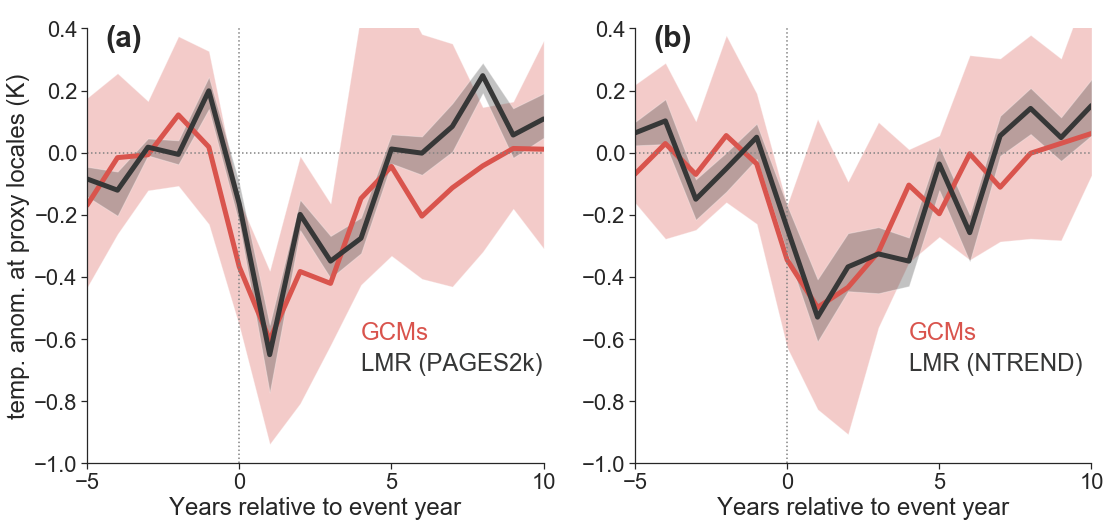

In [4]:
# plot Fig. 4

sns.set(style='ticks', font_scale=2)
fig = plt.figure(figsize=[18, 8])
gs = gridspec.GridSpec(1, 2)                                                                                                                                                       
gs.update(wspace=0.2, hspace=0.3)
ax1 = plt.subplot(gs[0])
alpha = 0.3
lw = 5
ylim = [-1.0, 0.4]

LMRt.visual.plot_sea_res(sea_GCMs_composite_pages2k, color=sns.xkcd_rgb['pale red'], xticks=[-5, 0, 5, 10],
                         ls='-', label='GCMs', shade_alpha=alpha, lw=lw, figsize=[7.75, 7.85],
                         ylabel='temp. anom. at proxy locales (K)', fig=fig, ax=ax1)
    
ax1.plot(sea_lmr_pages2k['composite_yr'], sea_lmr_pages2k['composite_qs'][1],
        lw=lw, color=sns.xkcd_rgb['dark grey'])
ax1.fill_between(sea_lmr_pages2k['composite_yr'], sea_lmr_pages2k['composite_qs'][0], sea_lmr_pages2k['composite_qs'][-1],
        facecolor=sns.xkcd_rgb['dark grey'], alpha=alpha)
ax1.set_ylim(ylim)
ax1.set_xlim([-5, 10])
ax1.text(4, -0.6, 'GCMs', color=sns.xkcd_rgb['pale red'])
ax1.text(4, -0.7, 'LMR (PAGES2k)', color=sns.xkcd_rgb['dark grey'])
    
#===========================
ax2 = plt.subplot(gs[1])
LMRt.visual.plot_sea_res(sea_GCMs_composite_ntrend, color=sns.xkcd_rgb['pale red'], xticks=[-5, 0, 5, 10],
                         ls='-', label='GCMs', shade_alpha=alpha, lw=lw, figsize=[7.75, 7.85],
                         ylabel='', fig=fig, ax=ax2)

ax2.plot(sea_lmr_ntrend['composite_yr'], sea_lmr_ntrend['composite_qs'][1],
        lw=lw, color=sns.xkcd_rgb['dark grey'])
ax2.fill_between(sea_lmr_ntrend['composite_yr'], sea_lmr_ntrend['composite_qs'][0], sea_lmr_ntrend['composite_qs'][-1],
        facecolor=sns.xkcd_rgb['dark grey'], alpha=alpha)
ax2.set_ylim(ylim)
ax2.set_xlim([-5, 10])
    
ax2.text(4, -0.6, 'GCMs', color=sns.xkcd_rgb['pale red'])
ax2.text(4, -0.7, 'LMR (NTREND)', color=sns.xkcd_rgb['dark grey'])

LMRt.visual.setlabel(ax1, '(a)', prop={'weight': 'bold', 'size': 30}, bbox_to_anchor=[0, 1.05])
LMRt.visual.setlabel(ax2, '(b)', prop={'weight': 'bold', 'size': 30}, bbox_to_anchor=[0, 1.05])
    
fig.savefig('../figs/Fig-4.pdf', bbox_inches='tight')